<a href="https://colab.research.google.com/github/farid-maulana/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Transformasi Linier Brightness

Formula: <br>
```
g(x,y) = f(x,y) + b
```
Keterangan:
- g(x,y) adalah nilai pixel setelah transformasi
- f(x,y) adalah nilai pixel asli
- b adalah nilai brightness


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 70


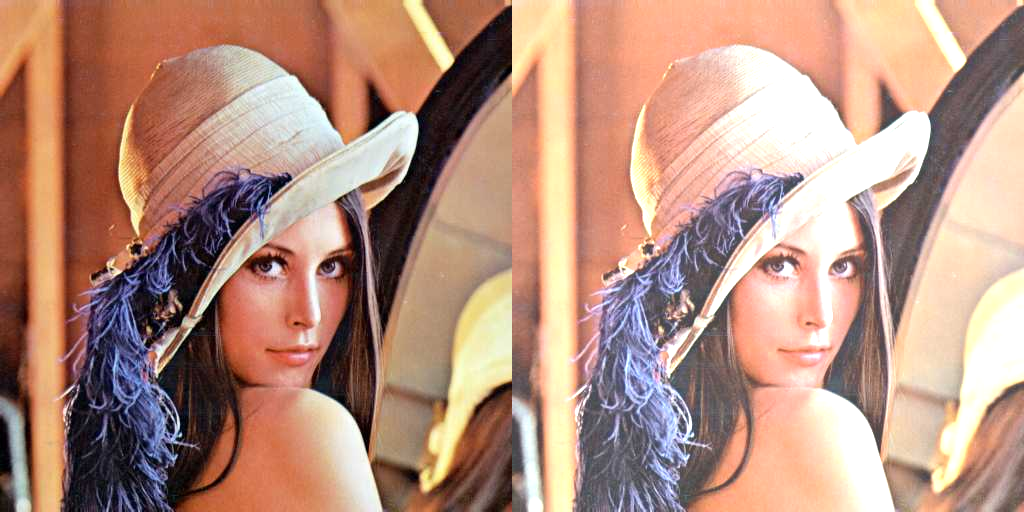

In [3]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread("/content/drive/MyDrive/Polinema/Pemrograman Citra dan Visi Komputer/Assets/Modul 2/Images/lena.jpg") # get image from gdrive
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Transformasi Contrast

Formula
```
g(x,y) = a * f(x,y) + b
```
Keterangan:
- g(x,y) adalah nilai pixel setelah transformasi
- f(x,y) adalah nilai pixel asli
- a adalah nilai contrast
- b adalah nilai brightness.


Mengubah kontras tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 65
Masukkan kontras [1.0 - 3.0]: 2


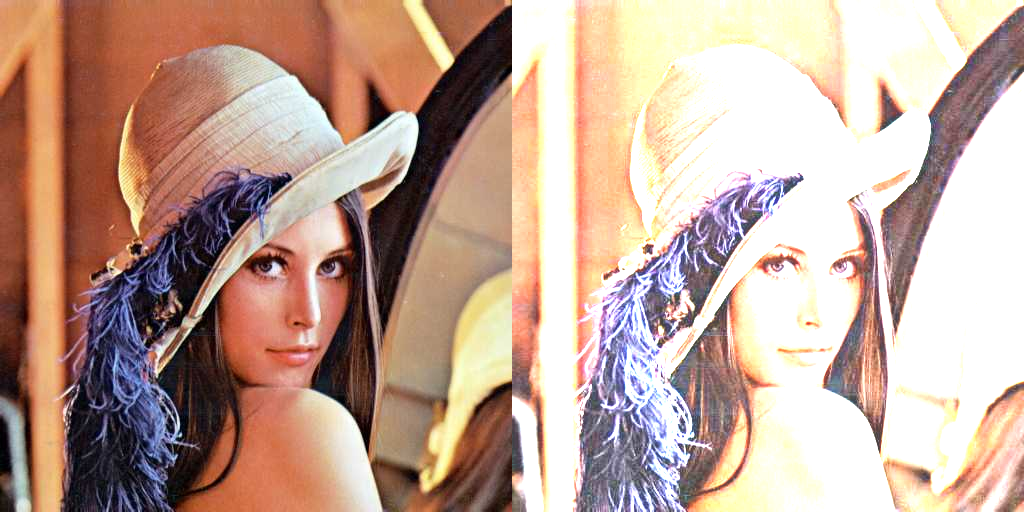

In [4]:
print('Mengubah kontras tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

# Transformasi Logarithmic Brightness

Formula:
```
s = c * log(1 + r)
```
Keterangan
- c adalah konstanta
- r adalah nilai grey-level citra input
- s adalah nilai grey-level citra output


 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 30


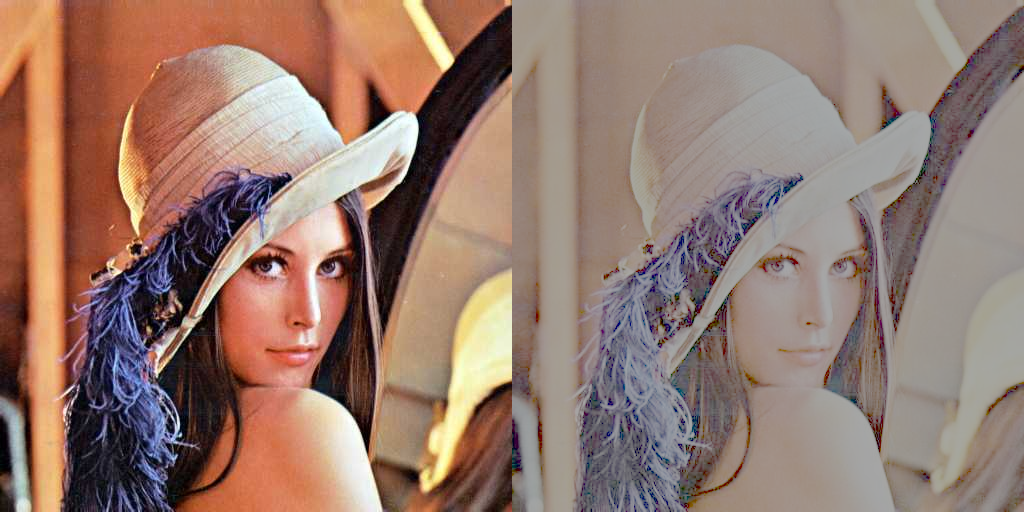

In [5]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Grayscale

Import image dan convert image dari BGR ke RGB

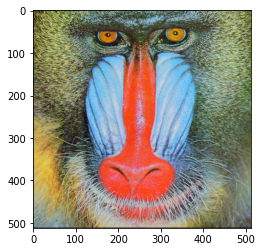

In [6]:
img = cv.imread("/content/drive/MyDrive/Polinema/Pemrograman Citra dan Visi Komputer/Assets/Modul 2/Images/mandrill.tiff")
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Grayscale Average

Formula:
```
Grayscale avg = (R + G + B) / 3
```



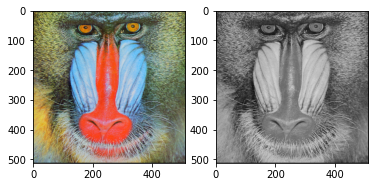

In [7]:
img_avg = img
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

### Grayscale Lightness

Formula:

```
Grayscale lighness = (max[R, G, B] + min [R, G, B]) / 2
```



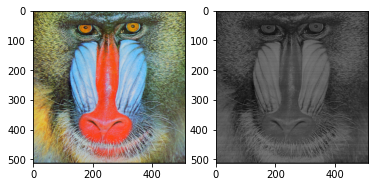

In [8]:
img_lightness = img
img_lightness[:] = np.max(img_lightness,axis=-1, keepdims=100)/2 + np.min(img_lightness,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lightness)

### Grayscale Luminance

Formula:

```
Grayscale luminance = 0.21R + 0.72G + 0.07B
```



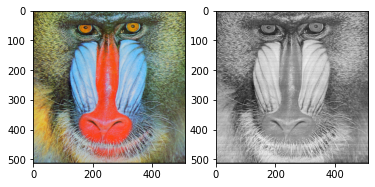

In [9]:
img_luminance = img
R, G, B = img_luminance[:,:,0], img_luminance[:,:,1], img_luminance[:,:,2]
gray_img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_luminance, cmap='gray')

# Inverse Citra

Formula:
```
g(x,y) = 255 - f(x,y)
```
Keterangan:
- g(x,y) adalah citra negative
- f(x,y) adalah citra asli


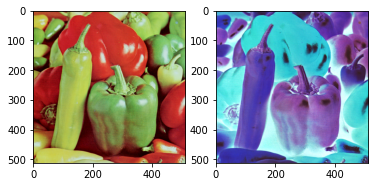

In [10]:
img = cv.imread("/content/drive/MyDrive/Polinema/Pemrograman Citra dan Visi Komputer/Assets/Modul 2/Images/peppers.tiff")
img_asli = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)